# Computational Neuroscience Project - Group 04

## Initialization

In [92]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import os
from src.LIF import LIF
from src.IFB import IFB
from src.utils import generate_stimulus, plot_gain_function, plot_trials
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
dt = 1e-4
if not os.path.isdir('./images'):
    os.makedirs('./images')

## Full Analysis (without noise)

### LIF Model

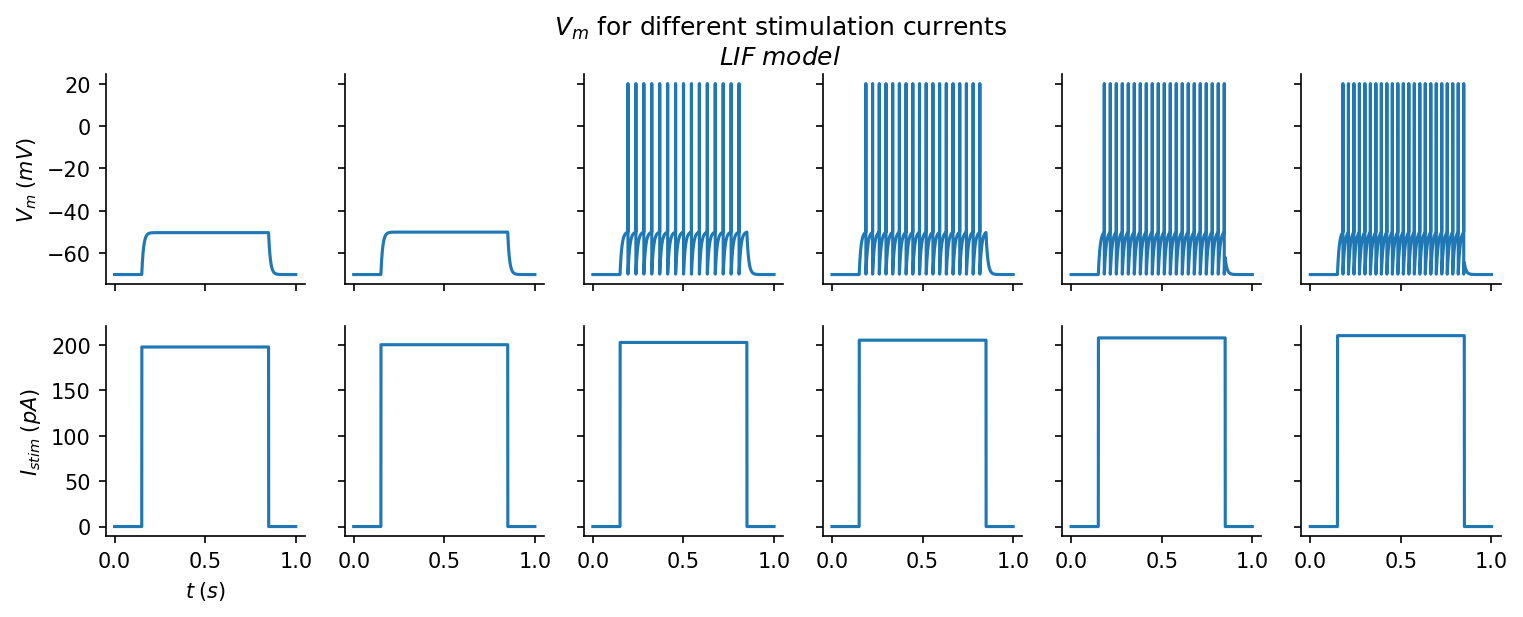

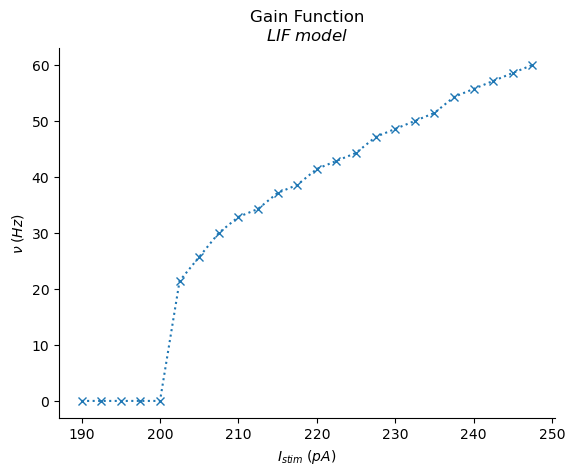

In [98]:
I_amplitudes = np.arange(190, 250, 2.5) * 1e-12
I_stim, t = generate_stimulus(I_amplitudes, simulation_time=1, t_on=0.15, t_off=0.85, dt=dt)

# Model initialization and execution
my_LIF = LIF()
my_LIF.run(I_stim, dt)

# Results plotting
plot_trials(t, my_LIF.V_m[3:9], I_stim[3:9], title='$V_{m}$ for different stimulation currents', subtitle='$LIF\;model$')
plt.savefig('./images/LIF_Vm.png', dpi=600)
plot_gain_function(I_amplitudes, my_LIF.get_firing_rate(dt), subtitle='$LIF\;model$')
plt.savefig('./images/LIF_gain.png', dpi=600)

The LIF neuron threshold current I_th = 200.0 pA
The LIF neuron derived threshold voltage V_th = -50.00000000000035 mV


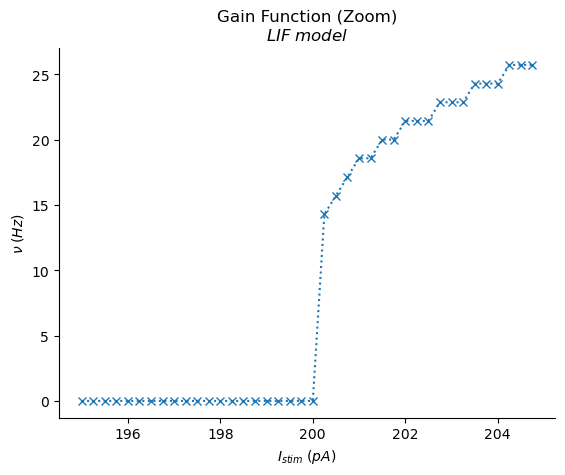

In [99]:
I_amplitudes = np.arange(195, 205, 0.25) * 1e-12
I_stim, t = generate_stimulus(I_amplitudes, simulation_time=1, t_on=0.15, t_off=0.85, dt=dt)

# Model initialization and execution
my_LIF = LIF()
my_LIF.run(I_stim, dt)

# Results plotting
plot_gain_function(I_amplitudes, my_LIF.get_firing_rate(dt), title='Gain Function (Zoom)', subtitle='$LIF\;model$')
plt.savefig('./images/LIF_gain_zoom.png', dpi=600)

I_th = I_amplitudes[np.max(np.where(my_LIF.get_firing_rate(dt) == 0))]
print('The LIF neuron threshold current I_th = ' + str(I_th * 1e12) + ' pA')

I_th_stim, t = generate_stimulus(I_th, simulation_time=1, t_on=0.15, t_off=0.85, dt=dt)
V_th = np.max(my_LIF.run(I_th_stim, dt))
print('The LIF neuron derived threshold voltage V_th = ' + str(V_th * 1e3) + ' mV')

### IFB Model

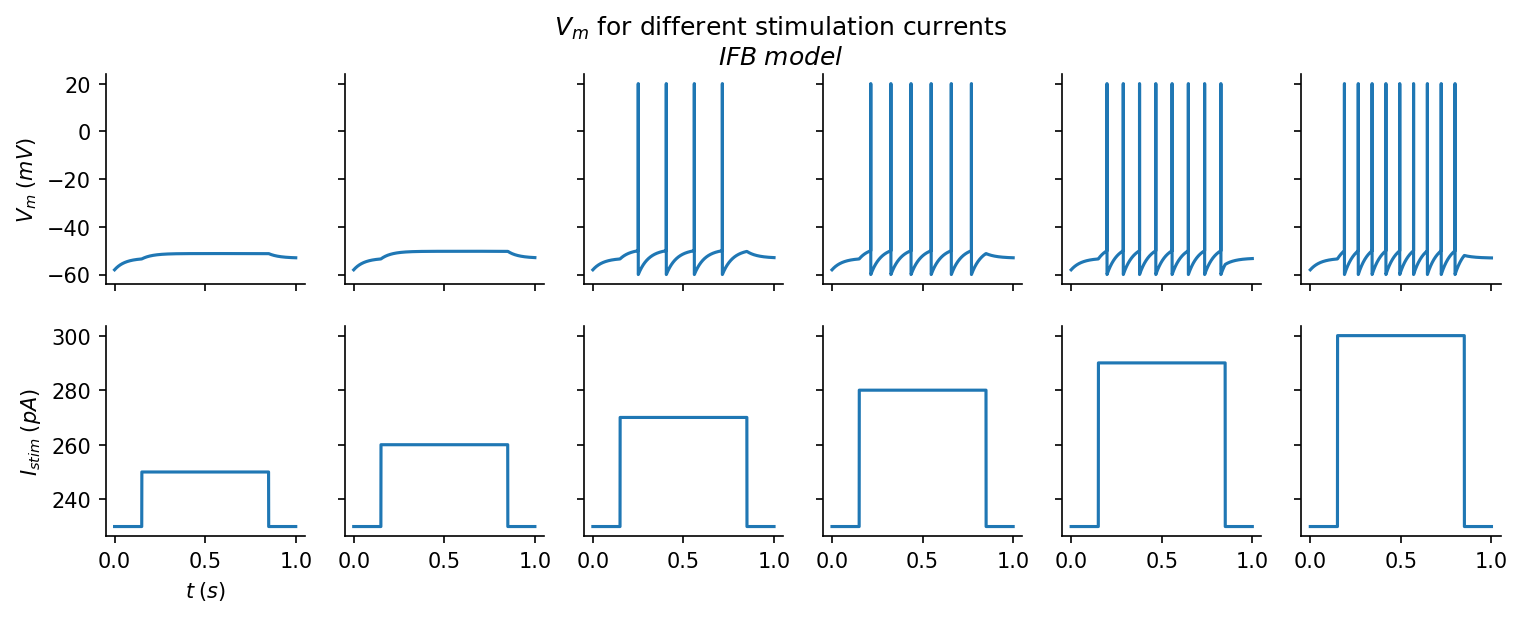

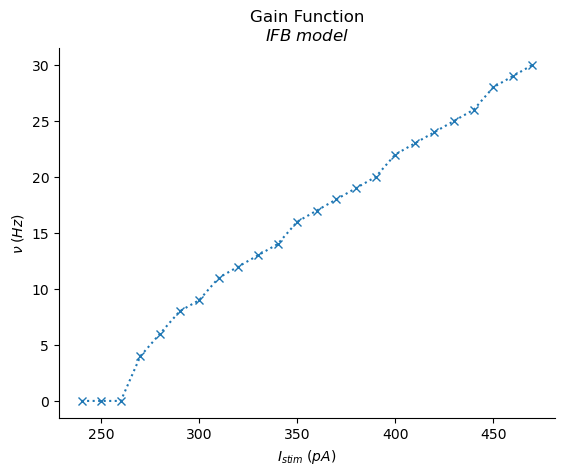

In [100]:
I_amplitudes_min = 230 * 1e-12
I_amplitudes_max = np.arange(10, 250, 10) * 1e-12 + I_amplitudes_min
I_amplitudes = np.zeros((np.size(I_amplitudes_max), 2))

for trial_idx, _ in enumerate(I_amplitudes_max):
    I_amplitudes[trial_idx] = np.array([I_amplitudes_min, I_amplitudes_max[trial_idx]])

I_stim, t = generate_stimulus(I_amplitudes, simulation_time=1, t_on=0.15, t_off=0.85, dt=dt)

# Model initialization and execution
V_0_tonic = -0.058
my_IFB = IFB()
my_IFB.run(I_stim, dt, V_0=V_0_tonic)

# Results plotting
plot_trials(t, my_IFB.V_m[1:7], I_stim[1:7], title='$V_{m}$ for different stimulation currents', subtitle='$IFB\;model$')
plt.savefig('./images/IFB_Vm.png', dpi=600)
plot_gain_function(I_amplitudes_max, my_IFB.get_firing_rate(dt), subtitle='$IFB\;model$')
plt.savefig('./images/IFB_gain.png', dpi=600)

The IFB neuron threshold current is I_th = 262.5 pA
The IFB neuron derived threshold voltage V_th = -50.00001701955789 mV


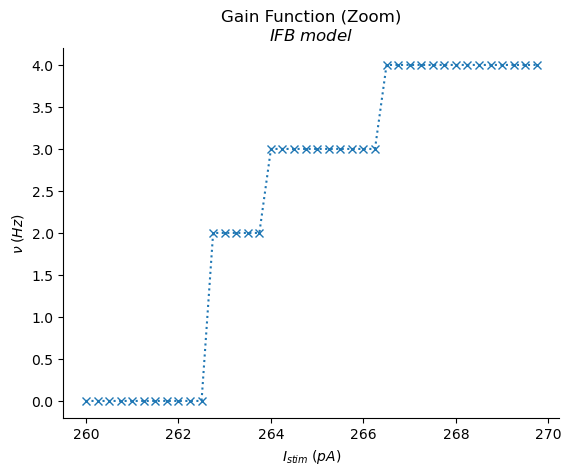

In [101]:
I_amplitudes_min = 230 * 1e-12
I_amplitudes_max = np.arange(30, 40, 0.25) * 1e-12 + I_amplitudes_min
I_amplitudes = np.zeros((np.size(I_amplitudes_max), 2))

for trial_idx, _ in enumerate(I_amplitudes_max):
    I_amplitudes[trial_idx] = np.array([I_amplitudes_min, I_amplitudes_max[trial_idx]])

I_stim, t = generate_stimulus(I_amplitudes, simulation_time=1, t_on=0.15, t_off=0.85, dt=dt)

# Model initialization and execution
V_0_tonic = -0.058
my_IFB = IFB()
my_IFB.run(I_stim, dt, V_0=V_0_tonic)

# Results plotting
plot_gain_function(I_amplitudes_max, my_IFB.get_firing_rate(dt), title='Gain Function (Zoom)', subtitle='$IFB\;model$')
plt.savefig('./images/IFB_gain_zoom.png', dpi=600)

I_th = I_amplitudes_max[np.max(np.where(my_IFB.get_firing_rate(dt) == 0))]
print('The IFB neuron threshold current is I_th = ' + str(I_th * 1e12) + ' pA')

I_th_stim, t = generate_stimulus(np.array([[I_amplitudes_min, I_th]]), simulation_time=1, t_on=0.15, t_off=0.85, dt=dt)
V_th = np.max(my_IFB.run(I_th_stim, dt))
print('The IFB neuron derived threshold voltage V_th = ' + str(V_th * 1e3) + ' mV')

## Full Analysis (with noisy stimulations)

### LIF Model

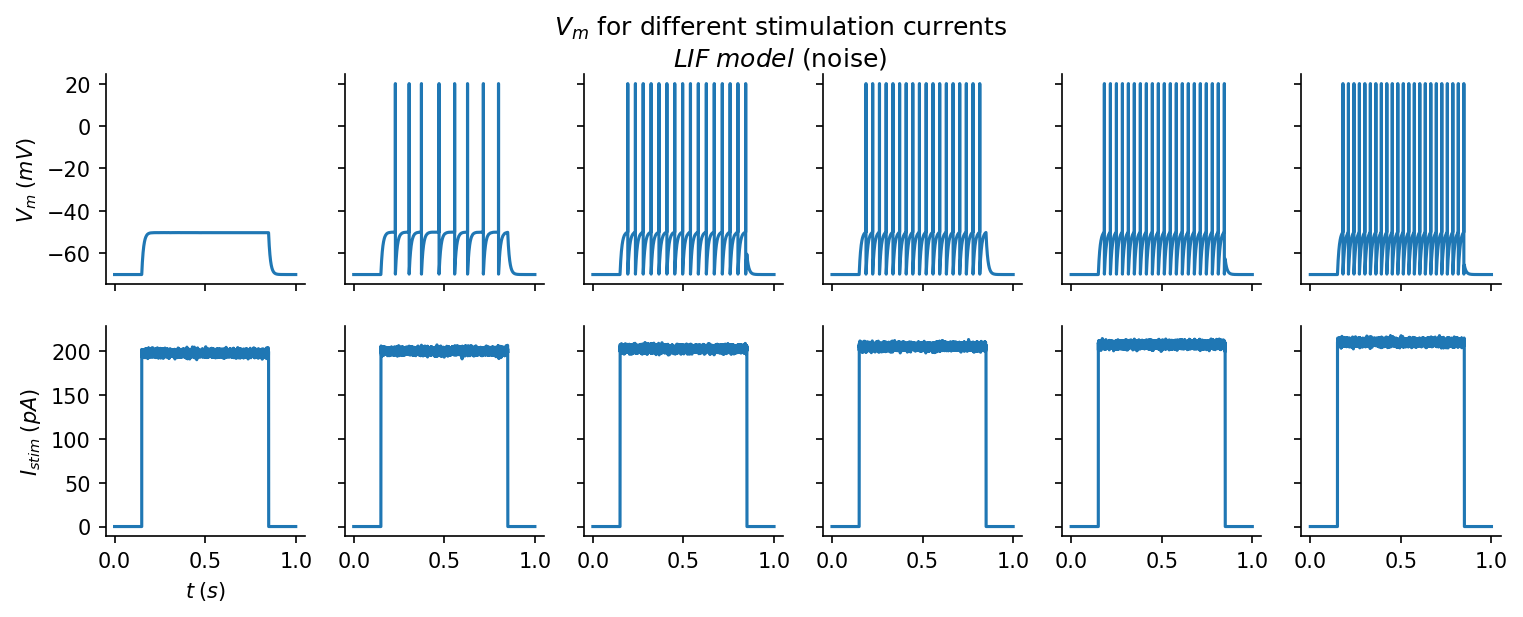

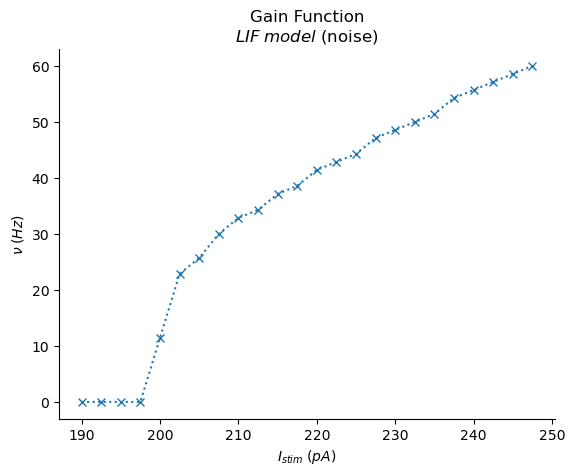

In [102]:
I_amplitudes = np.arange(190, 250, 2.5) * 1e-12
I_stim, t = generate_stimulus(I_amplitudes, simulation_time=1, t_on=0.15, t_off=0.85, dt=dt, is_noisy=True)

# Model initialization and execution
my_LIF = LIF()
my_LIF.run(I_stim, dt)

# Results plotting
plot_trials(t, my_LIF.V_m[3:9], I_stim[3:9], title='$V_{m}$ for different stimulation currents', subtitle='$LIF\;model$ (noise)')
plt.savefig('./images/LIF_Vm_noise.png', dpi=600)
plot_gain_function(I_amplitudes, my_LIF.get_firing_rate(dt), subtitle='$LIF\;model$ (noise)')
plt.savefig('./images/LIF_gain_noise.png', dpi=600)

The LIF neuron threshold current I_th = 199.49999999999997 pA
The LIF neuron derived threshold voltage V_th = -50.05000000000035 mV


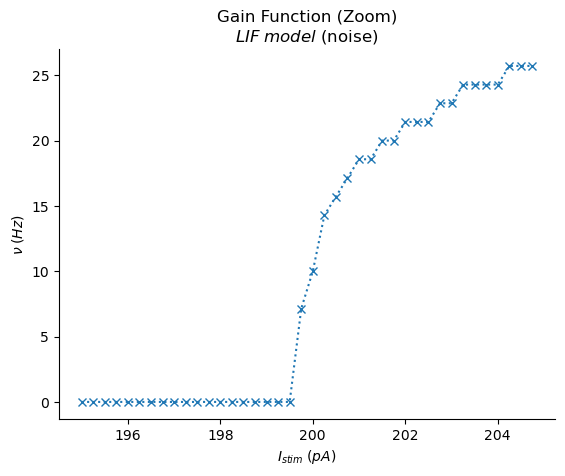

In [103]:
I_amplitudes = np.arange(195, 205, 0.25) * 1e-12
I_stim, t = generate_stimulus(I_amplitudes, simulation_time=1, t_on=0.15, t_off=0.85, dt=dt, is_noisy=True)

# Model initialization and execution
my_LIF = LIF()
my_LIF.run(I_stim, dt)

# Results plotting
plot_gain_function(I_amplitudes, my_LIF.get_firing_rate(dt), title='Gain Function (Zoom)', subtitle='$LIF\;model$ (noise)')
plt.savefig('./images/LIF_gain_zoom_noise.png', dpi=600)

I_th = I_amplitudes[np.max(np.where(my_LIF.get_firing_rate(dt) == 0))]
print('The LIF neuron threshold current I_th = ' + str(I_th * 1e12) + ' pA')

I_th_stim, t = generate_stimulus(I_th, simulation_time=1, t_on=0.15, t_off=0.85, dt=dt)
V_th = np.max(my_LIF.run(I_th_stim, dt))
print('The LIF neuron derived threshold voltage V_th = ' + str(V_th * 1e3) + ' mV')

### IFB Model

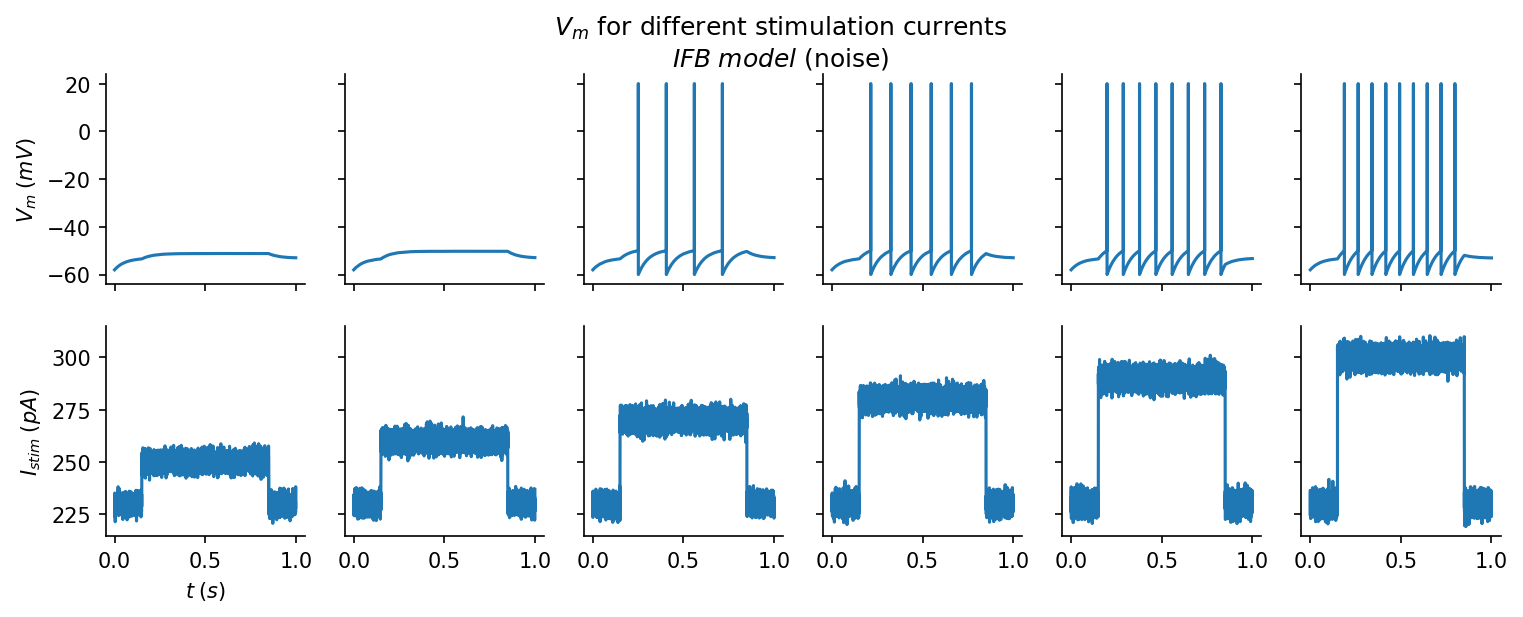

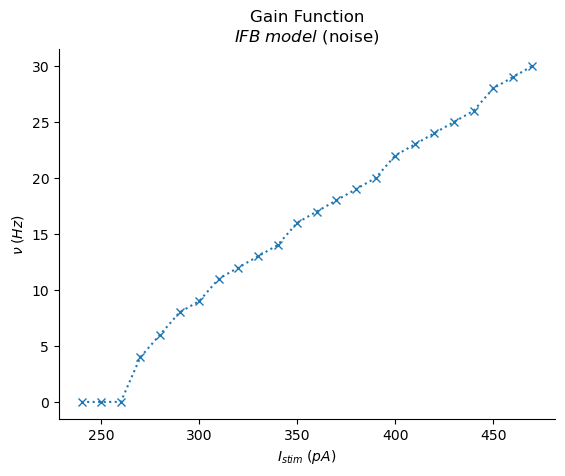

In [108]:
I_amplitudes_min = 230 * 1e-12
I_amplitudes_max = np.arange(10, 250, 10) * 1e-12 + I_amplitudes_min
I_amplitudes = np.zeros((np.size(I_amplitudes_max), 2))

for trial_idx, _ in enumerate(I_amplitudes_max):
    I_amplitudes[trial_idx] = np.array([I_amplitudes_min, I_amplitudes_max[trial_idx]])

I_stim, t = generate_stimulus(I_amplitudes, simulation_time=1, t_on=0.15, t_off=0.85, dt=dt, is_noisy=True)

# Model initialization and execution
V_0_tonic = -0.058
my_IFB = IFB()
my_IFB.run(I_stim, dt, V_0=V_0_tonic)

# Results plotting
plot_trials(t, my_IFB.V_m[1:7], I_stim[1:7], title='$V_{m}$ for different stimulation currents', subtitle='$IFB\;model$ (noise)')
plt.savefig('./images/IFB_Vm_noise.png', dpi=600)
plot_gain_function(I_amplitudes_max, my_IFB.get_firing_rate(dt), subtitle='$IFB\;model$ (noise)')
plt.savefig('./images/IFB_gain_noise.png', dpi=600)

The IFB neuron threshold current is I_th = 262.25 pA
The IFB neuron derived threshold voltage V_th = -50.0238264306521 mV


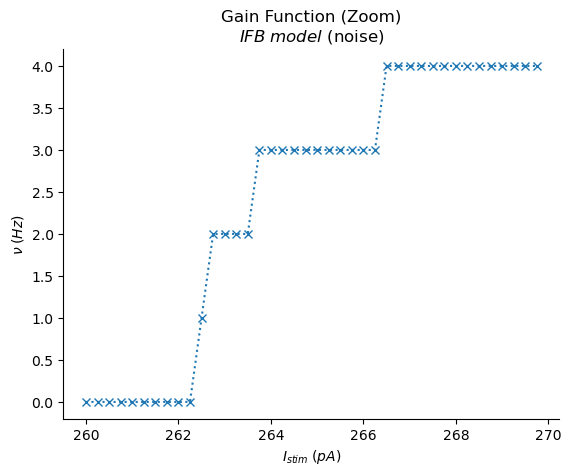

In [105]:
I_amplitudes_min = 230 * 1e-12
I_amplitudes_max = np.arange(30, 40, 0.25) * 1e-12 + I_amplitudes_min
I_amplitudes = np.zeros((np.size(I_amplitudes_max), 2))

for trial_idx, _ in enumerate(I_amplitudes_max):
    I_amplitudes[trial_idx] = np.array([I_amplitudes_min, I_amplitudes_max[trial_idx]])

I_stim, t = generate_stimulus(I_amplitudes, simulation_time=1, t_on=0.15, t_off=0.85, dt=dt, is_noisy=True)

# Model initialization and execution
V_0_tonic = -0.058
my_IFB = IFB()
my_IFB.run(I_stim, dt, V_0=V_0_tonic)

# Results plotting
plot_gain_function(I_amplitudes_max, my_IFB.get_firing_rate(dt), title='Gain Function (Zoom)', subtitle='$IFB\;model$ (noise)')
plt.savefig('./images/IFB_gain_zoom_noise.png', dpi=600)

I_th = I_amplitudes_max[np.max(np.where(my_IFB.get_firing_rate(dt) == 0))]
print('The IFB neuron threshold current is I_th = ' + str(I_th * 1e12) + ' pA')

I_th_stim, t = generate_stimulus(np.array([[I_amplitudes_min, I_th]]), simulation_time=1, t_on=0.15, t_off=0.85, dt=dt)
V_th = np.max(my_IFB.run(I_th_stim, dt))
print('The IFB neuron derived threshold voltage V_th = ' + str(V_th * 1e3) + ' mV')

## IFB Tonic Spiking vs. Bursting

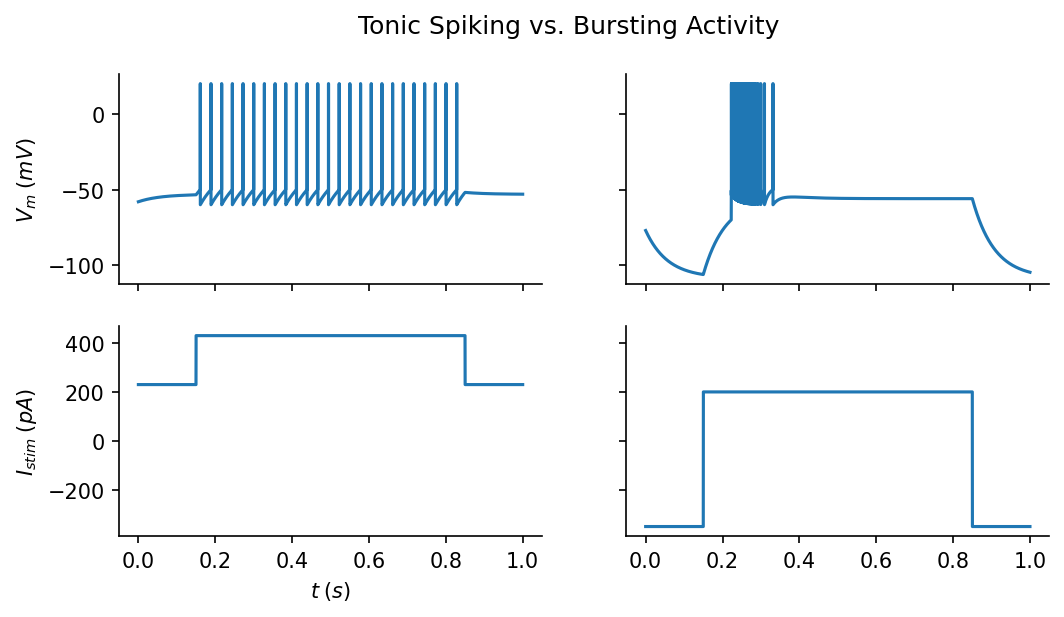

In [107]:
I_amplitudes_tonic = np.array([[230, 430]]) * 1e-12
I_amplitudes_bursting = np.array([[-350, 200]]) * 1e-12

I_stim_tonic, t = generate_stimulus(I_amplitudes_tonic, simulation_time=1, t_on=0.15, t_off=0.85, dt=dt)
I_stim_bursting, t = generate_stimulus(I_amplitudes_bursting, simulation_time=1, t_on=0.15, t_off=0.85, dt=dt)

# Model initialization and execution
V_0_tonic = -0.058
V_0_bursting = -0.077
my_IFB = IFB()
V_m_tonic = my_IFB.run(I_stim_tonic, dt, V_0=V_0_tonic)
V_m_bursting = my_IFB.run(I_stim_bursting, dt, V_0=V_0_bursting)

# Results plotting
plot_trials(t, np.concatenate([V_m_tonic, V_m_bursting], axis=0), np.concatenate([I_stim_tonic, I_stim_bursting], axis=0), title='Tonic Spiking vs. Bursting Activity', fig_width=4)
plt.savefig('./images/IFB_tonic_bursting.png', dpi=600)